# Numerical Data

Numerical data consists of values including integers and rational numbers. Temperature collections, height recordings, and numerical grades in a class are examples of numerical data. In this section, we will practice making histograms, scatter plots, and line graphs to represent numerical data.

Again, we'll load the necessary libraries and data.

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

NorthAmerica_Military_USD_PercentGDP_Combined_csv = '''\
Year,CAN-PercentGDP,MEX-PercentGDP,USA-PercentGDP,CAN-USD,MEX-USD,USA-USD
1960,4.18525654,0.673508659,8.993124587,1.702442711,0.084,47.34655267
1961,4.128312243,0.651780326,9.1560315,1.677820881,0.0864,49.87977061
1962,3.999216389,0.689655172,9.331672945,1.671313753,0.0992,54.65094261
1963,3.620650112,0.718685832,8.831891186,1.610091701,0.112,54.56121578
1964,3.402062837,0.677506775,8.051281106,1.657457283,0.12,53.43232706
1965,2.930260659,0.591269841,7.587247177,1.57470454,0.1192,54.56179126
1966,2.683282422,0.576379066,8.435300286,1.614422827,0.1304,66.44275153
1967,2.74792677,0.545217107,9.417795933,1.775500366,0.1336,78.39844224
1968,2.54364188,0.548510764,9.268454275,1.797265817,0.1488,84.32903122
1969,2.27378467,0.600160043,8.633263795,1.770108751,0.18,84.99016543
1970,2.188979696,0.497411659,8.032743584,1.889157918,0.1768,83.407993
1971,2.131485639,0.48765558,6.943069609,2.077659711,0.1912,78.23797989
1972,2.011818438,0.536568089,6.519756924,2.233737031,0.2424,80.70807097
1973,1.832601818,0.544217687,5.893870591,2.363060955,0.3008,81.46979441
1974,1.783813085,0.565744137,5.954111197,2.809465529,0.4072,89.27892034
1975,1.863541853,0.57358422,5.622679096,3.18091549,0.5048,92.08092875
1976,1.765927978,0.598103574,5.191071429,3.581805735,0.531576968,94.71525108
1977,1.8057636,0.534256205,5.155617351,3.752174526,0.437692986,104.665219
1978,1.848887401,0.504834431,4.943087248,3.969158477,0.518287193,113.3820637
1979,1.711245918,0.505297474,4.951991535,4.084145738,0.679663588,126.8799271
1980,1.764448615,0.416107383,5.153537467,4.744402251,0.810422204,143.6883549
1981,1.709915638,0.513301014,5.646541256,5.141128191,1.284948561,176.5588753
1982,1.954343585,0.495419418,6.814057094,6.017321456,0.858130163,221.6735426
1983,2.081196249,0.522866314,6.32114426,6.947104072,0.778556797,223.427165
1984,2.117188855,0.65981906,6.23641653,7.349795764,1.155945373,245.1491683
1985,2.097376234,0.676313139,6.453219205,7.460563318,1.241863652,272.1632293
1986,2.109197118,0.634622463,6.626522658,7.78013674,0.817296612,295.5462238
1987,2.062576371,0.580341889,6.420274023,8.694447168,0.813391574,304.0866487
1988,1.986767119,0.536145374,6.071277702,9.897335684,0.981914646,309.6612693
1989,1.934614309,0.517255829,5.871206008,10.74713469,1.153375828,321.8665588
1990,1.958793742,0.433081035,5.605175294,11.41463185,1.210872502,325.129314
1991,1.895444339,0.435402301,4.883429398,11.3385033,1.459136041,299.3727791
1992,1.8616877,0.469454656,4.970466808,10.78880312,1.824550066,325.033736
1993,1.821753504,0.442785494,4.604350295,10.26882262,2.122980338,316.7194437
1994,1.696680257,0.518830327,4.215264675,9.57737764,2.635284079,308.084
1995,1.554090071,0.450891531,3.860245792,9.176903908,1.562615372,295.8530977
1996,1.403752581,0.476484778,3.554982206,8.615884471,1.882873103,287.9606687
1997,1.246243202,0.458095854,3.405562244,7.945140183,2.184061042,293.1678258
1998,1.256293902,0.450450487,3.201558499,7.748607984,2.263223453,290.9960551
1999,1.241703064,0.460988776,3.085676783,8.21077854,2.652912012,298.0948913
2000,1.11808088,0.44604782,3.112242147,8.299385231,3.031454509,320.0863242
2001,1.137368973,0.442657004,3.123809803,8.375571425,3.229469276,331.8056106
2002,1.120852292,0.421606002,3.447618099,8.495399281,3.172268734,378.4631388
2003,1.115878799,0.405916547,3.827161045,9.958245602,2.960496802,440.5320696
2004,1.107966027,0.364898723,4.016312736,11.33648983,2.854385965,492.9993762
2005,1.110669655,0.355958931,4.090034876,12.98813296,3.123454978,533.203
2006,1.125832408,0.311171936,4.041627237,14.8098928,3.035131019,558.335
2007,1.188901783,0.401163918,4.079655081,17.41713993,4.223037646,589.586
2008,1.248621382,0.390513227,4.463827356,19.3420584,4.334654124,656.756
2009,1.377555631,0.501556275,4.88559968,18.93622605,4.514233914,705.917
2010,1.194338338,0.452734493,4.922641677,19.31568883,4.789031339,738.005
2011,1.193291895,0.465777803,4.840173995,21.39372086,5.498458542,752.288
2012,1.118404598,0.475987281,4.477401219,20.45210711,5.717035575,725.205
2013,1.0023672,0.507919455,4.046678879,18.51573121,6.473144378,679.229
2014,0.989925299,0.513829957,3.69589465,17.85364048,6.758693845,647.789
2015,1.152709374,0.466676122,3.477845166,17.93764189,5.468837812,633.829639
2016,1.164161567,0.495064414,3.418942337,17.78277554,5.33687574,639.856443
2017,1.351602232,0.436510296,3.313381294,22.26969632,5.062076646,646.752927
2018,1.324681094,0.477517407,3.316248808,22.72932758,5.839521271,682.4914
2019,1.27894142,0.52348249,3.427080181,22.20440844,6.650808254,734.3441
2020,1.415055841,0.573651659,3.741160091,22.75484713,6.116376582,778.2322
'''

from io import StringIO

NorthAmerica_Military_USD_PercentGDP_Combined_file = StringIO(NorthAmerica_Military_USD_PercentGDP_Combined_csv)

military = pd.read_csv(NorthAmerica_Military_USD_PercentGDP_Combined_file, index_col='Year')

## Histograms

Histograms are a great way to view distributions of numerical data. In histogram plots, a numerical component of data is divided into what are called *bins*. As data points are assigned to their respective bins, the total number of data points in each bin is quantified and plotted, visualizing a distribution of frequencies. In the upcoming exercise, we will explore how to visualize a distribution of values in our dataset.


Let's examine military spending in the United States from 1960 to 2020. We can look at multiple ranges of dollar amounts spent on the military as our independent variable and organize them into bins. After, we can determine how many fiscal years fall into each of these bins and visualize the distribution.

First, we will need to extract the data pertaining to the military spending in the United States. We will call it `hist_data`. Then, we will need to determine the minimum and maximum values of this subset of data so that we can determine the range of values.

In [3]:
hist_data = military["USA-USD"]

{
    'min': hist_data.min(),
    'max': hist_data.max(),
}

{'min': 47.34655267, 'max': 778.2322}

We see that the minimum amount the United States spent on the military between the years of 1960 and 2020 was about \$47 billion, while the maximum amount was about \$780 billion.

With this information, we will create a range for our bins, named `binnum`, with integers between 0 and 801, so that it is inclusive of all the data values. We make the interval of the range 100, giving us eight evenly spaced bins.

In [4]:
binnum = range(0, 801, 100)

list(binnum)

[0, 100, 200, 300, 400, 500, 600, 700, 800]

To graph the distribution of military spending, we will make a histogram by calling the `plt.hist()` funtion.

Minimally, this function needs an input set of values. Additionally, we will specify the bins, so that they are evenly distributed on the x-axis. We do this by inputting `binnum` as our `bins` argument. If we do not specify the `bin` argument, the data will be divided into 10 bins.

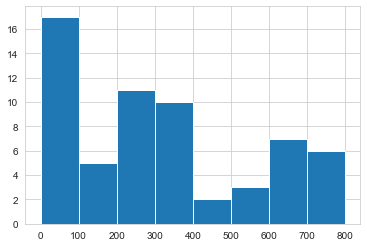

In [5]:
plt.hist(hist_data, bins=binnum)

plt.show()

Now that we have our plot, let's add additional details to make it more understandable:

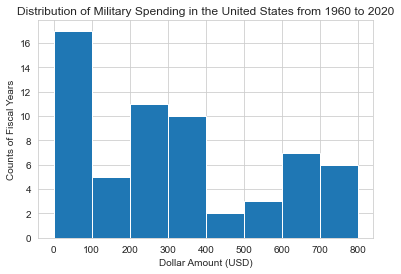

In [6]:
plt.hist(hist_data, bins=binnum)
plt.title("Distribution of Military Spending in the United States from 1960 to 2020")
plt.ylabel('Counts of Fiscal Years')
plt.xlabel("Dollar Amount (USD)")
plt.show()

Awesome! From this plot, we can see that the United States had the highest frequency of fiscal years where \$0 - \$100 billion was spent on the military. We can also see that the \$400 - \$500 billion bin had the lowest frequency with only two years spending that range of money.

## Scatter plots

Next, we'll examine the use of a scatter plot as another visualization tool for numerical data.

Scatter plots visualize the relationship between two numerical variables. For this exercise, let's examine the percentage of the GDP of Mexico spent on the military versus the absolute dollar amount (in USD) over 1960-2020.

We'll simply extract the columns for this data and assign them to `mex_gdp` and `mex_usd`, respectively. Then, we can plot this data using the `plt.scatter()` function.

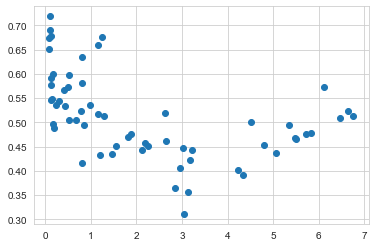

In [141]:
mex_gdp = military[['MEX-USD']]

mex_usd = military['MEX-PercentGDP']

plt.scatter(mex_gdp, mex_usd)  # mex_gdp on the x-axis, mex_usd on the y-axis

plt.show()

Looking at this scatter plot out of context, it would be hard to understand what the data means. Let's add the important details to make it clear:

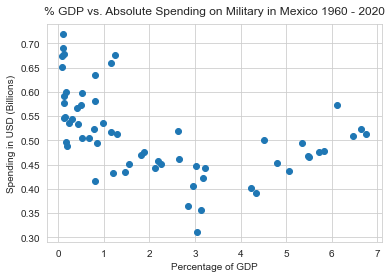

In [142]:
(fig, ax) = plt.subplots()

plt.scatter(mex_gdp, mex_usd)

plt.title("% GDP vs. Absolute Spending on Military in Mexico 1960 - 2020", pad=10)

ax.set_ylabel('Spending in USD (Billions)')
ax.set_xlabel('Percentage of GDP')

plt.show()

Now, we have a better understanding of the data, which depicts the relationship between the percentage of the Mexican GDP spent on the military and the total amount spent in USD from the years 1960 to 2020. 

In addition to this information, we can add a color scheme that will color each data point based on the year of collection. This adds another dimension of analysis, using year as a feature; the context of the spending relationship can be examined over time:

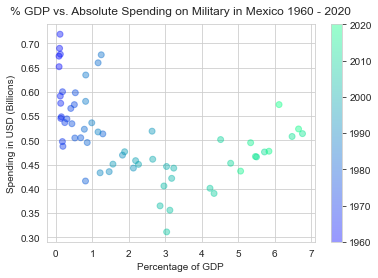

In [143]:
(fig, ax) = plt.subplots()
plt.title("% GDP vs. Absolute Spending on Military in Mexico 1960 - 2020", pad=10)
ax.set_ylabel('Spending in USD (Billions)')
ax.set_xlabel('Percentage of GDP')


mex_years = mex_gdp.index

plt.scatter(mex_gdp, mex_usd, c=mex_years, alpha=0.4, cmap='winter')

plt.colorbar()

plt.show()

The `plt.scatter()` function minimally needs two arguments - *x* and *y* - which are array-like variables. Other optional arguments include `c`, which determines how to color the data points; `alpha`, which sets the opacity of the data points; and `cmap` which sets the Colormap used to color the data points. 

We used the years of the dataset (which we defined as the index earlier in this chapter) as our `c` argument to color the data points based on the year of collection. We used used the 'winter' Colormap as our `cmap` argument, but many other Colormaps are available for your choosing. A list of other possible Colormaps to explore is linked at the end of this section.

The `plt.colorbar()` function displays a scale of the Colormap based on the feature used to color the data, which in our case is the year of collection.

## Line graphs

Line graphs are used to visualize sequential numerical data. Using line graphs, we can easily see trends within data over time.

Let's examine the spending (in USD) on the military in Canada in the 21st century (2000-2020).

This can be done most quickly through the pandas Series.

In [10]:
can_usd = military.loc[2000:2020, 'CAN-USD']

can_usd

Year
2000     8.299385
2001     8.375571
2002     8.495399
2003     9.958246
2004    11.336490
2005    12.988133
2006    14.809893
2007    17.417140
2008    19.342058
2009    18.936226
2010    19.315689
2011    21.393721
2012    20.452107
2013    18.515731
2014    17.853640
2015    17.937642
2016    17.782776
2017    22.269696
2018    22.729328
2019    22.204408
2020    22.754847
Name: CAN-USD, dtype: float64

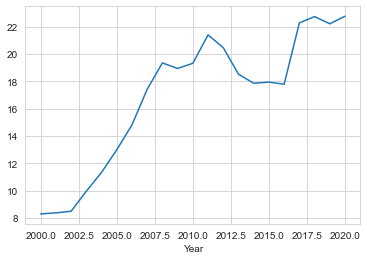

In [11]:
can_usd.plot();

To use matplotlib directly, we first extract the years of interest and assign it to the variable `years`.

In [13]:
years = can_usd.index

years

Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
           dtype='int64', name='Year')

Then, we call `plt.plot()` and specifiy the years on the x-axis and the spending on the y-axis.

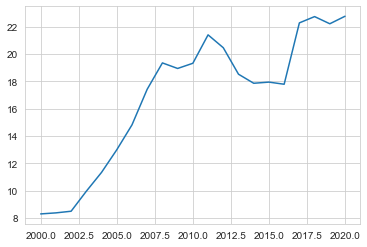

In [14]:
plt.plot(years, can_usd);

We can see from the graph that Canada's spending on the military has increased overall since 2000. The country had a period of time (around 2011 to 2017) where military spending was decreasing consistently.

Let's add the data for Mexico as well to see the country's spending in the 21<sup>st</sup> century.

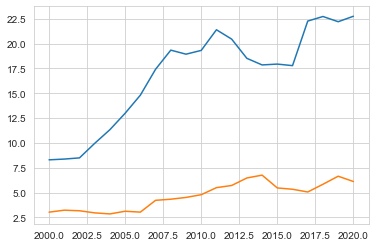

In [15]:
mex_usd = military.loc[2000:2099, 'MEX-USD']

plt.plot(years, can_usd)
plt.plot(years, mex_usd);

We can now see that the military spending for both Mexico and Canada is vastly different. However, just looking at this graph out of context, we wouldn't be able to tell which line corresponds to which country. Let's add some descriptive details, such as line labels, a title, and axis labels. Let's also fix the x-axis ticks to set an interval for every five years.

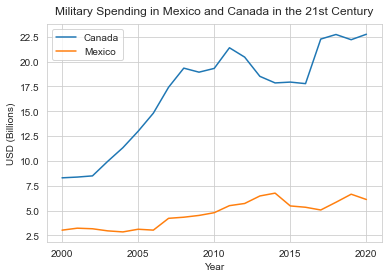

In [16]:
plt.plot(years, can_usd, label='Canada')
plt.plot(years, mex_usd, label='Mexico')

plt.title("Military Spending in Mexico and Canada in the 21st Century", pad=10)
plt.ylabel('USD (Billions)')
plt.xlabel('Year')
plt.xticks(range(2000, 2025, 5))

plt.legend(loc="best")

plt.show()

We can see that the overall trend of military spending in Mexico also increased from 2000 to 2020. However, this increase was a lot less drastic than observed in Canada. Mexico's military spending was a steady rise from about \$3 billion to \$6 billion over the course of 20 years, while Canada's spending rose from \$8 billion to about \$23 billion over the same period of time.

Let's add data from the United States to see the trends in all North American countries.

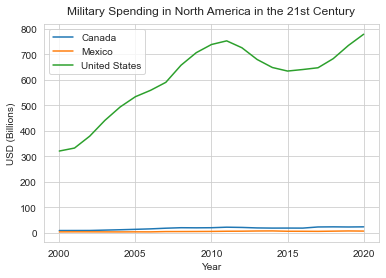

In [17]:
usa_usd = military.loc[2000:2099, 'USA-USD']

plt.plot(years, can_usd, label='Canada')
plt.plot(years, mex_usd, label='Mexico')
plt.plot(years, usa_usd, label='United States')

plt.title("Military Spending in North America in the 21st Century", pad=10)
plt.ylabel('USD (Billions)')
plt.xlabel('Year')
plt.xticks(range(2000, 2025, 5))

plt.legend(loc="best")

plt.show()

With the addition of the data from the United States, it's diffiult to discern the data from Canada and Mexico. Because the spending on the military in the United States was a lot higher, plotting all three datasets on the same graph with the same axis does not allow us to clearly see trends in the other countries.

To address this, we can graph the data for each country separately with axis limits that are tailored to each country. If we graph this data side by side, we can see the trends in each country while acknowledging that the axis intervals for each country provides a numerical context for cross-comparisons.

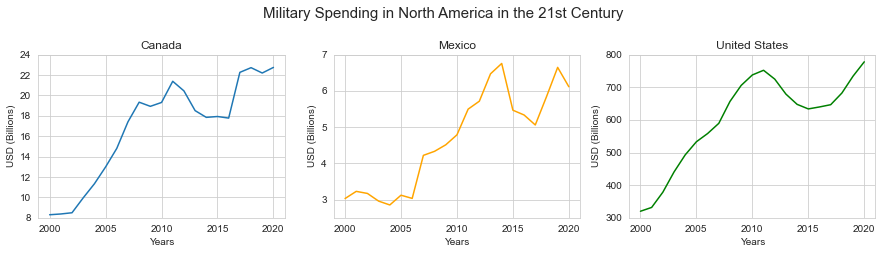

In [20]:
(fig, (ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(15, 3))

fig.suptitle('Military Spending in North America in the 21st Century', y=1.1, fontsize=15)

ax1.plot(years, can_usd)
ax1.set_title('Canada')
ax1.set_ylim([8, 24])
ax1.set_xlabel('Years')
ax1.set_ylabel('USD (Billions)')

ax2.plot(years, mex_usd, color='orange')
ax2.set_title('Mexico')
ax2.set_ylim([2.5, 7])
ax2.set_xlabel('Years')
ax2.set_ylabel('USD (Billions)')

ax3.plot(years, usa_usd, color='green')
ax3.set_title('United States')
ax3.set_ylim([300, 800])
ax3.set_xlabel('Years')
ax3.set_ylabel('USD (Billions)')

plt.show()

Now that we've created separate plots, we can see the trends for all three countries over the last 20 years. All three countries seem to have decreased spending around 2011 and 2018. By observing the difference in scale, we can also see that while the trends are similar, the magnitude of spending was very different between Canada, Mexico, and the United States.

In creating these plots, we used `plt.subplots()` in a way that we had not used it before. Here, we defined our `fig` argument, as well as three `axes` arguments, `ax1`, `ax2`, and `ax3`. This allowed us to create <u>three</u> separate plotting areas, bounded by <u>three</u> different axes, that are contained within <u>one</u> figure.

## Conclusions

In this section, we learned how to use `plt.hist()`, `plt.scatter()`, and `plt.plot()` to create histograms, scatter plots, and line graphs as a means of visualizing numerical data.

The `plt.scatter()` and `plt.plot()` functions require numerical arrays that serve as `x` and `y` arugments.

The `plt.hist()` function requires an array of values for plotting distributions of data.

We also learned about a number of other functions that can be used to enhance and annotate our plots. Documentation for the functions used in this section, and related functions, are listed below:

- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html">plt.hist( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html">plt.scatter( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html">plt.plot( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html">fig.suptitle( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html">ax.set_title( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylim.html">ax.set_ylim( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlim.html">ax.set_xlim( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html">ax.set_ylabel( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html">ax.set_xlabel( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html">plt.colorbar( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/tutorials/colors/colormaps.html">Colormap options</a>